<a href="https://colab.research.google.com/github/Alex-Dandamudi/Skin-cancer-detection-using-Deep-Learning-models/blob/main/DL_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#downloading dataset from kaggle
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

Dataset URL: https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign
License(s): unknown
 97% 316M/325M [00:03<00:00, 111MB/s] 
100% 325M/325M [00:03<00:00, 104MB/s]


In [2]:
#extracting dataset from zip file by unzipping
import zipfile
a = zipfile.ZipFile('/content/skin-cancer-malignant-vs-benign.zip','r')
a.extractall('/content')
a.close()

In [3]:
#importing libraries
#numpy for arrays
import numpy as np
#pandas for data analaysis
import pandas as pd
#os for directories
import os
#matplot for displaying images and plotting images
import matplotlib.pyplot as plt
import seaborn as sns
#glob is used for files and determing path
from glob import glob
#random seed to generate random values. Sending images to training
np.random.seed(21)


In [4]:
from PIL import Image
#load the training and testing files
directory_benign_train = '/content/train/benign'
directory_malignant_train = '/content/train/malignant'
directory_benign_test = '/content/test/benign'
directory_malignant_test = '/content/test/malignant'
read = lambda imname: np.asarray(Image.open(imname).convert('RGB').resize((32,32)))

#reading files
img_benign_train = [read(os.path.join(directory_benign_train, filename)) for filename in os.listdir(directory_benign_train)]
img_malignant_train = [read(os.path.join(directory_malignant_train, filename)) for filename in os.listdir(directory_malignant_train)]


img_benign_test = [read(os.path.join(directory_benign_test, filename)) for filename in os.listdir(directory_benign_test)]
img_malignant_test = [read(os.path.join(directory_malignant_test, filename)) for filename in os.listdir(directory_malignant_test)]

type(img_benign_train)

list

In [5]:
#converting images to arrays of unsigned 8 bit integer
X_benign_train = np.array(img_benign_train, dtype='uint8')
X_malignant_train = np.array(img_malignant_train, dtype='uint8')

X_benign_test = np.array(img_benign_test, dtype='uint8')
X_malignant_test = np.array(img_malignant_test, dtype='uint8')

type(X_benign_train)

numpy.ndarray

In [6]:
#labeling dieases as 1 or 0
y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

y_malignant_train

array([1., 1., 1., ..., 1., 1., 1.])

In [7]:
#combiining all images
X_train = np.concatenate((X_benign_train, X_malignant_train), axis=0)
y_train = np.concatenate((y_benign_train, y_malignant_train), axis=0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

y_test

Shape of X_train:  (2637, 32, 32, 3)
Shape of y_train:  (2637,)
Shape of X_test:  (660, 32, 32, 3)
Shape of y_test:  (660,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
#randomly shuffling all the images
s1 = np.arange(X_train.shape[0])
np.random.shuffle(s1)
X_train = X_train[s1]
y_train = y_train[s1]

s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]
print(X_train)

[[[[179 138 169]
   [180 138 169]
   [181 137 168]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[180 138 171]
   [181 140 172]
   [184 141 173]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[182 141 174]
   [183 141 173]
   [185 145 177]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[114  78  94]
   [117  82  99]
   [121  88 104]
   ...
   [192 162 188]
   [192 163 194]
   [192 164 198]]

  [[110  72  91]
   [111  73  91]
   [113  76  93]
   ...
   [191 162 193]
   [191 162 192]
   [188 158 188]]

  [[109  71  92]
   [108  70  90]
   [109  70  89]
   ...
   [189 161 191]
   [188 160 187]
   [187 156 183]]]


 [[[162 138 149]
   [174 152 164]
   [177 154 165]
   ...
   [159 131 133]
   [152 119 117]
   [152 121 122]]

  [[171 146 158]
   [173 147 160]
   [175 148 160]
   ...
   [158 129 131]
   [152 121 123]
   [149 118 115]]

  [[173 144 157]
   [175 146 158]
   [179 152 164]
   ...
   [159 132 133]
   [156 128 129]
   [152 123

In [9]:
print("Shuffle orders example: ", s1)


Shuffle orders example:  [1410  127 2157 ...  772 1848 1231]


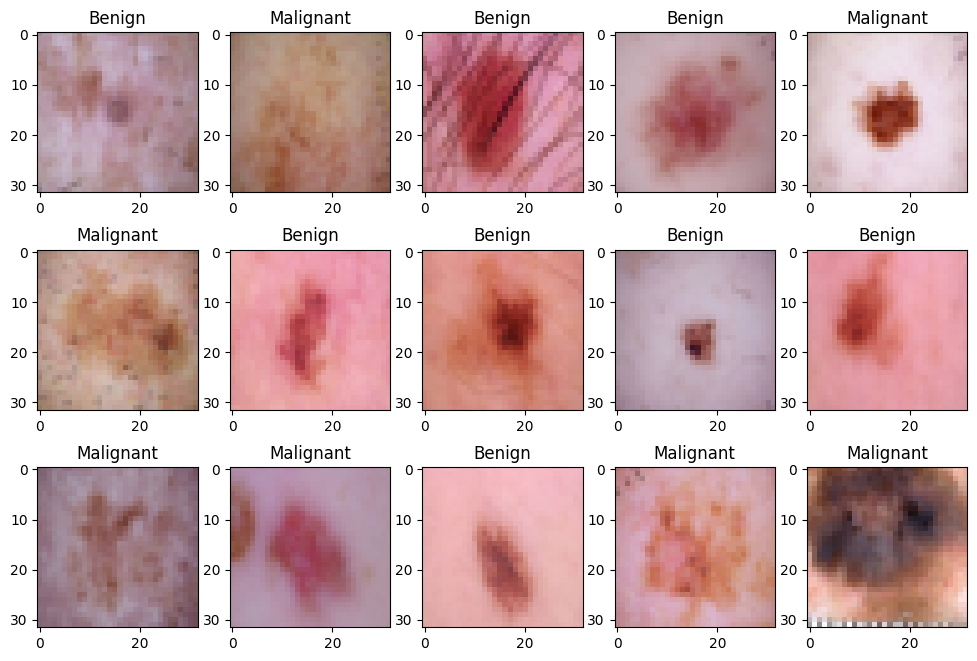

In [10]:
#displaying images using matplot
fig = plt.figure(figsize=(12,8))
columns = 5
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [11]:
#converting the labels (y_train and y_test) from single integers (0 and 1) into categorical one-hot encoded vectors.
import keras
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

type(y_train)

numpy.ndarray

In [12]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [13]:
#scaling the pixel values of your image data to the range [0, 1] by dividing each pixel value by 255.
X_train = X_train/255
X_test = X_test/255

In [14]:
#applying CNN model for binary classification
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_cnn_model(input_shape = (32, 32, 3), num_classes=2):
    model = Sequential()

    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', input_shape = input_shape, activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    model.add(Dense(num_classes, activation = 'softmax'))
    model.summary()
    optimizer= Adam(learning_rate=0.001)

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model
model_cnn = build_cnn_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 579,906 (2.21 MB)

 Trainable params: 579,906 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr = 1e-4)


history = model_cnn.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(X_test,y_test))



print(history.history.keys())

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step - accuracy: 0.5896 - loss: 0.6718 - val_accuracy: 0.7167 - val_loss: 0.6463 - learning_rate: 0.0010
Epoch 2/50
22/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6771 - loss: 0.6152

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6941 - loss: 0.5885 - val_accuracy: 0.7636 - val_loss: 0.5118 - learning_rate: 0.0010
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7683 - loss: 0.4901 - val_accuracy: 0.7909 - val_loss: 0.4464 - learning_rate: 0.0010
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7887 - loss: 0.4211 - val_accuracy: 0.7985 - val_loss: 0.3933 - learning_rate: 0.0010
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8011 - loss: 0.4152 - val_accuracy: 0.8288 - val_loss: 0.3611 - learning_rate: 0.0010
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7897 - loss: 0.4006 - val_accuracy: 0.7803 - val_loss: 0.4048 - learning_rate: 0.0010
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8062 - loss: 0.3881 - val_accuracy: 0.8242 - val_loss: 0.3621 - learning_rate: 0.0010
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8279 - loss: 0.3714 - val_accuracy: 0.8379 - va

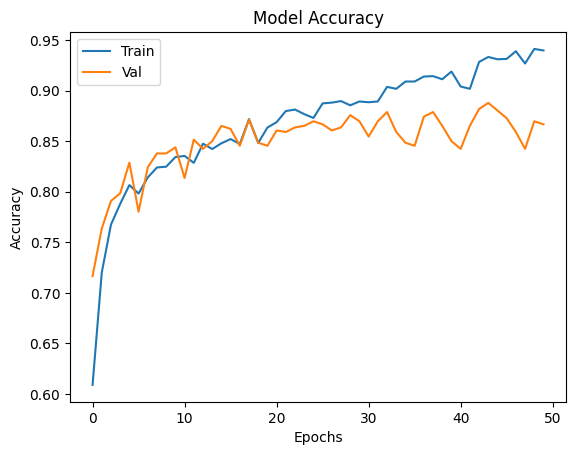

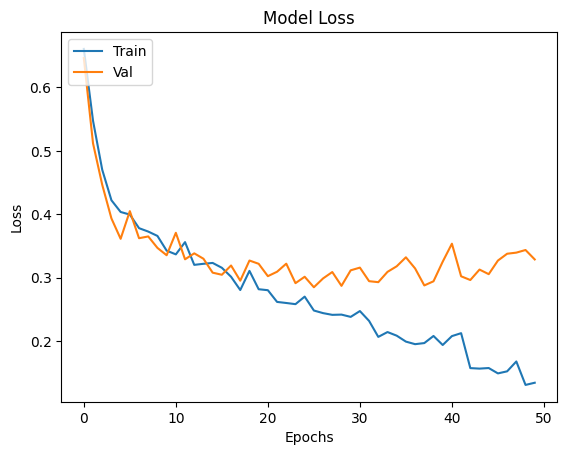

In [16]:
#plotting acuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

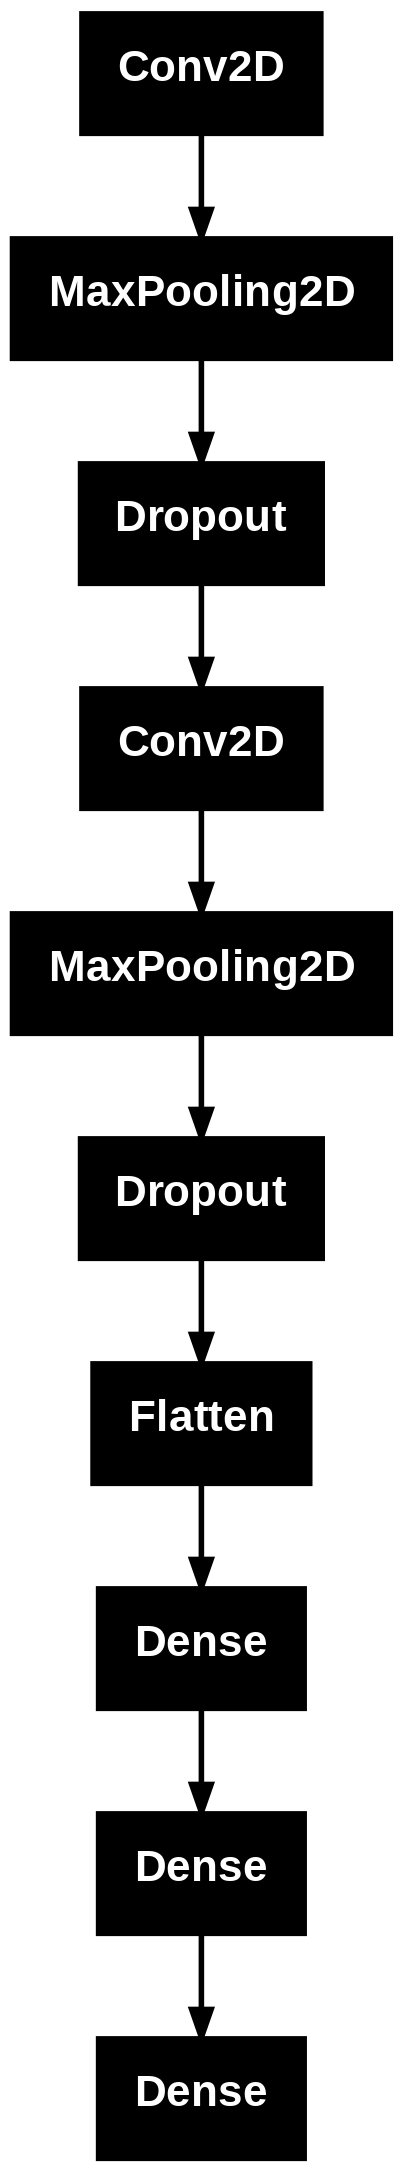

In [17]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

In [18]:
!pip install keras_efficientnets

In [19]:
!pip install keras_applications

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.1 MB/s eta 0:00:00


In [21]:
# building a CNN model that incorporates a pre-trained ResNet50 base model for feature extraction and adds additional layers for classification.
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define input shape to be used by ResNet
input_shape = (32, 32, 3)

# Create the base model with a defined input shape
base_model = ResNet50(include_top=False, weights="imagenet", input_shape=input_shape, pooling='avg') # Add pooling to get a fixed output shape from ResNet

def build_cnn_model(input_shape = (32, 32, 3), num_classes=2):
    # Create a Functional model instead of Sequential
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs)
    x = Flatten()(x)

    x = Dense(128, activation='relu', kernel_initializer='normal')(x)
    x = Dense(128, activation='relu', kernel_initializer='normal')(x)
    outputs = Dense(2, activation = 'softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    optimizer= Adam(learning_rate=0.001) # Change 'lr' to 'learning_rate'
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    # Now you can safely display the summary
    model.summary()

    return model

model_cnn = build_cnn_model()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,866,754 (91.04 MB)

 Trainable params: 23,813,634 (90.84 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [22]:
# ReduceLROnPlateau callback in Keras to adjust the learning rate during training based on the validation accuracy
from keras.callbacks import ReduceLROnPlateau
learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr = 1e-4)


history = model_cnn .fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(X_test,y_test))



print(history.history.keys())

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 797ms/step - accuracy: 0.7553 - loss: 0.5154 - val_accuracy: 0.4545 - val_loss: 4.2206 - learning_rate: 0.0010
Epoch 2/50
 3/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7752 - loss: 0.3758

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8390 - loss: 0.3469 - val_accuracy: 0.4545 - val_loss: 2.3645 - learning_rate: 0.0010
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8558 - loss: 0.3184 - val_accuracy: 0.4545 - val_loss: 6.7538 - learning_rate: 0.0010
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8785 - loss: 0.2767 - val_accuracy: 0.4545 - val_loss: 5.4807 - learning_rate: 0.0010
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9062 - loss: 0.2341 - val_accuracy: 0.4545 - val_loss: 1.2171 - learning_rate: 0.0010
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9176 - loss: 0.2284 - val_accuracy: 0.4545 - val_loss: 22.9553 - learning_rate: 0.0010
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9136 - loss: 0.2213 - val_accuracy: 0.4545 - val_loss: 20.4328 - learning_rate: 0.0010
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9376 - loss: 0.1600 - val_accuracy: 0.

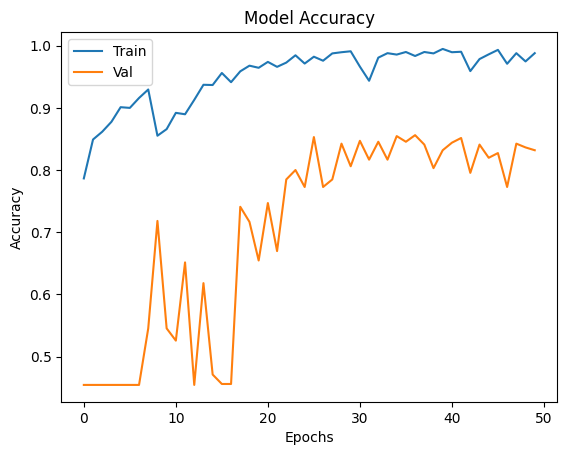

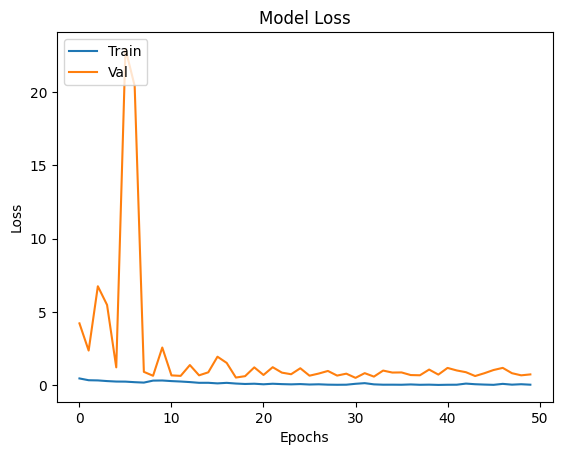

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

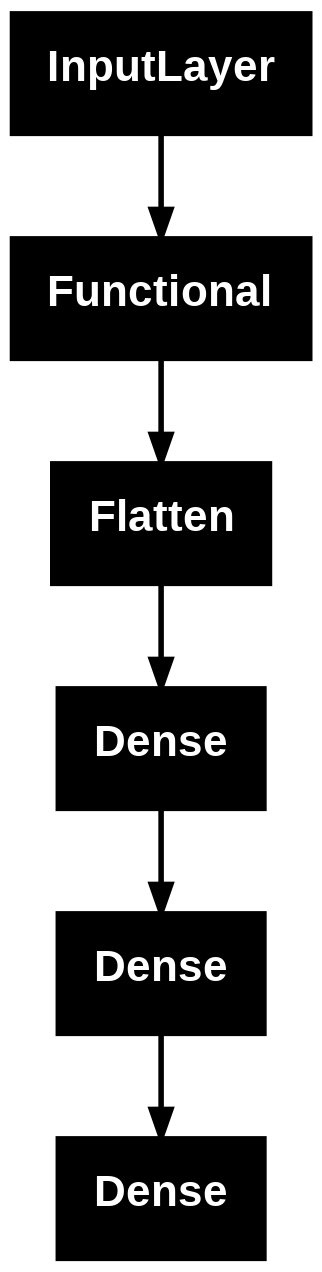

In [24]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

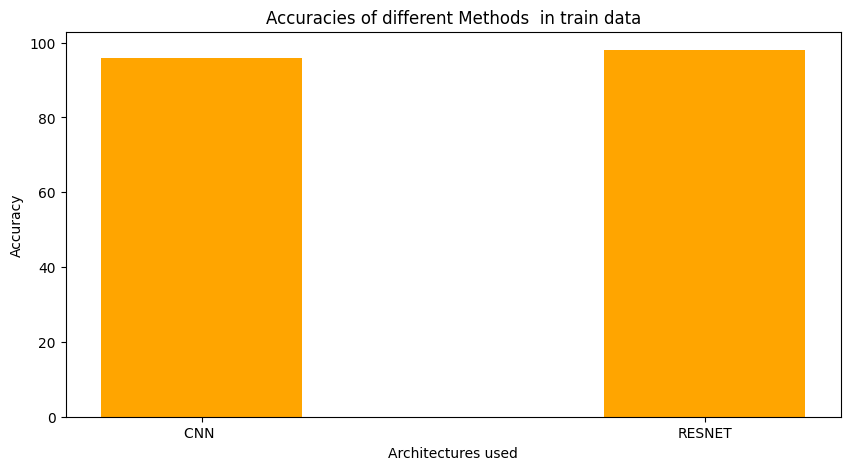

In [25]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = { 'CNN ':96 , 'RESNET':98}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='orange',
        width = 0.4)

plt.xlabel("Architectures used")
plt.ylabel("Accuracy")
plt.title("Accuracies of different Methods  in train data")
plt.show()

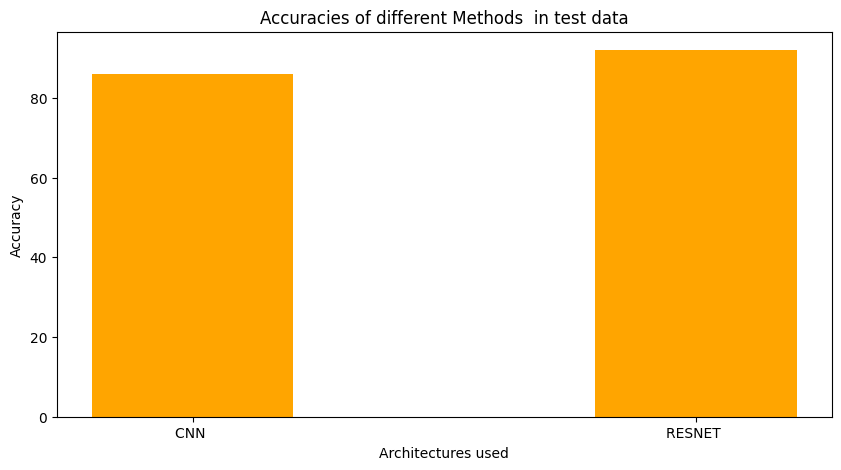

In [26]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = { 'CNN ':86,  'RESNET ':92}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='orange',
        width = 0.4)

plt.xlabel("Architectures used")
plt.ylabel("Accuracy")
plt.title("Accuracies of different Methods  in test data")
plt.show()

In [28]:
import cv2

In [29]:
a=cv2.imread('/content/benign.jpg')

In [30]:
import cv2

# Try to load the image
a = cv2.imread('/content/benign.jpg')

# Check if the image was loaded successfully
if a is None:
    print("Error: Could not load image. Check the file path and permissions.")
else:
    # Proceed with image processing if the image was loaded
    print("Image loaded successfully.")
    #shape of input image
    print(a.shape)

Image loaded successfully.
(300, 480, 3)


In [31]:
#reading image
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/benign.jpg', target_size=(32, 32))

In [32]:
#converting predicting image to numpy array
img_array = image.img_to_array(img)
#print(img_array)
#filling the dimensions which are empty
img_batch = np.expand_dims(img_array, axis=0)
print(img_batch)

[[[[169. 132. 123.]
   [199. 162. 156.]
   [167. 118. 113.]
   ...
   [147. 102.  99.]
   [127.  96.  93.]
   [102.  76.  79.]]

  [[184. 141. 135.]
   [199. 168. 165.]
   [188. 143. 137.]
   ...
   [147. 108. 103.]
   [129.  94.  90.]
   [119.  93.  94.]]

  [[200. 163. 157.]
   [186. 158. 154.]
   [176. 146. 138.]
   ...
   [150. 109. 105.]
   [138.  97.  95.]
   [109.  73.  73.]]

  ...

  [[164. 130. 118.]
   [212. 156. 143.]
   [217. 165. 151.]
   ...
   [160. 116. 113.]
   [140. 105. 103.]
   [122.  88.  89.]]

  [[160. 128. 115.]
   [212. 154. 142.]
   [222. 165. 154.]
   ...
   [159. 118. 116.]
   [132.  92.  92.]
   [107.  73.  72.]]

  [[162. 126. 112.]
   [206. 155. 138.]
   [223. 175. 163.]
   ...
   [153. 114. 109.]
   [135.  97.  96.]
   [114.  85.  87.]]]]


In [33]:
#highlighing the image details by converting RGB TO BGR
img_preprocessed = preprocess_input(img_batch)
print(img_preprocessed)

[[[[ 19.060997   15.221001   45.32     ]
   [ 52.060997   45.221      75.32     ]
   [  9.060997    1.2210007  43.32     ]
   ...
   [ -4.939003  -14.778999   23.32     ]
   [-10.939003  -20.779       3.3199997]
   [-24.939003  -40.779     -21.68     ]]

  [[ 31.060997   24.221      60.32     ]
   [ 61.060997   51.221      75.32     ]
   [ 33.060997   26.221      64.32     ]
   ...
   [ -0.939003   -8.778999   23.32     ]
   [-13.939003  -22.779       5.3199997]
   [ -9.939003  -23.779      -4.6800003]]

  [[ 53.060997   46.221      76.32     ]
   [ 50.060997   41.221      62.32     ]
   [ 34.060997   29.221      52.32     ]
   ...
   [  1.060997   -7.7789993  26.32     ]
   [ -8.939003  -19.779      14.32     ]
   [-30.939003  -43.779     -14.68     ]]

  ...

  [[ 14.060997   13.221001   40.32     ]
   [ 39.060997   39.221      88.32     ]
   [ 47.060997   48.221      93.32     ]
   ...
   [  9.060997   -0.7789993  36.32     ]
   [ -0.939003  -11.778999   16.32     ]
   [-14.939003  

In [34]:
a=history.model.predict(img_preprocessed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [35]:
print(a)

[[1. 0.]]


In [36]:
def classify(a):
  if (a[0][0]==1 and a[0][1]==0):
    print("benign")
  else:
    print("malignant")

In [37]:
print(classify(a))

benign
None
